In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
%matplotlib inline
import warnings
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns',None)

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Balanced/balanced_resized_dataset_64x64.csv')

In [ ]:
IMG_H=64
IMG_W=64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.drop(columns=['label']), dataset['label'], test_size=0.2, random_state=42)

In [ ]:
import gc
del dataset
gc.collect()

4

In [ ]:
classes={0:('actinic keratoses and intraepithelial carcinomae(Cancer)'),
         1:('basal cell carcinoma(Cancer)'),
         2:('benign keratosis-like lesions(Non-Cancerous)'),
         3:('dermatofibroma(Non-Cancerous)'),
         4:('melanocytic nevi(Non-Cancerous)'),
         5:('pyogenic granulomas and hemorrhage(Can lead to cancer)'),
         6:('melanoma(Cancer)')}

In [ ]:
for k in range(7):
  print("Number of ", classes[k],"images: ", len([i for i in y_train if i==k]))

Number of  actinic keratoses and intraepithelial carcinomae(Cancer) images:  2801
Number of  basal cell carcinoma(Cancer) images:  2812
Number of  benign keratosis-like lesions(Non-Cancerous) images:  2819
Number of  dermatofibroma(Non-Cancerous) images:  2828
Number of  melanocytic nevi(Non-Cancerous) images:  2774
Number of  pyogenic granulomas and hemorrhage(Can lead to cancer) images:  2758
Number of  melanoma(Cancer) images:  2808


### Training 1

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(IMG_H,IMG_W, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │       6,553,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │              

 Total params: 6,992,167 (26.67 MB)

 Trainable params: 6,991,047 (26.67 MB)

 Non-trainable params: 1,120 (4.38 KB)

In [ ]:
optimizer = Adam(0.00001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,mode='max', min_lr=0.00001,verbose=1)
early_stop = EarlyStopping(monitor="val_loss", patience=2, verbose=1)
model_chkpt = ModelCheckpoint('artifacts/base_model/best_model_aug.keras',save_best_only=True, monitor='val_accuracy',verbose=1)

callback_list = [model_chkpt,lr_reduce]

In [ ]:
x_train = x_train.values.reshape(-1, IMG_H,IMG_W, 3)
x_test = x_test.values.reshape(-1, IMG_H,IMG_W, 3)
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
history = model.fit(x_train,
                      y_train,
                      validation_split=0.2,
                      batch_size=256,
                      epochs=20,
                      shuffle=True,
                      callbacks=callback_list)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1704 - loss: 2.3843
Epoch 1: val_accuracy improved from -inf to 0.15485, saving model to artifacts/base_model/best_model_aug.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 237s 4s/step - accuracy: 0.1710 - loss: 2.3820 - val_accuracy: 0.1548 - val_loss: 1.9759 - learning_rate: 1.0000e-05
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2815 - loss: 1.9694
Epoch 2: val_accuracy did not improve from 0.15485
62/62 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.2817 - loss: 1.9686 - val_accuracy: 0.1536 - val_loss: 1.9718 - learning_rate: 1.0000e-05
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3313 - loss: 1.7982
Epoch 3: val_accuracy improved from 0.15485 to 0.22347, saving model to artifacts/base_model/best_model_aug.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 0.3315 - loss: 1.7978 - val_accuracy: 0.2235 - val_loss: 1.8735 - learning_rate: 1.0000e-05
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3s

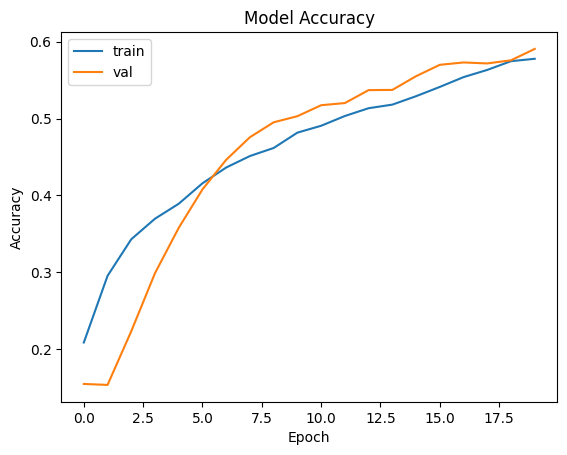

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

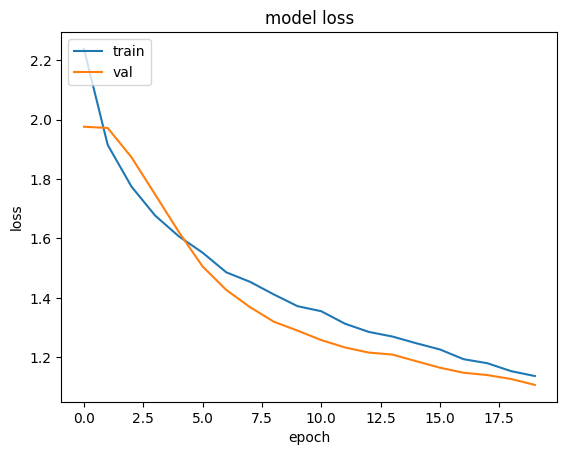

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
save_path = '/content/drive/MyDrive/artifacts/BaseModel/best_base_model.keras'
model.save(save_path)

### Training 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5,5), input_shape=(IMG_H, IMG_W, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))


model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      16,777,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │              

 Total params: 17,216,551 (65.68 MB)

 Trainable params: 17,215,431 (65.67 MB)

 Non-trainable params: 1,120 (4.38 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler



optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0005, decay=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Callbacks
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=4, min_lr=0.00001, verbose=1)
early_stop = EarlyStopping(monitor="val_loss", patience=4, verbose=1, restore_best_weights=True)
model_chkpt = ModelCheckpoint('artifacts/base_model/best_model_new.keras', save_best_only=True, monitor='val_accuracy', verbose=1)


# Learning Rate Warmup Function
def warmup_scheduler(epoch, lr):
    if epoch < 5:
        return lr * 1.5  # Gradually increase LR in first 5 epochs
    return lr

lr_scheduler = LearningRateScheduler(warmup_scheduler)

# Final Callback List
callback_list = [model_chkpt, lr_reduce, early_stop, lr_scheduler]

In [ ]:
x_train = x_train.values.reshape(-1, IMG_H,IMG_W, 3)
x_test = x_test.values.reshape(-1, IMG_H,IMG_W, 3)

# Normalizing pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0


y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
history = model.fit(x_train,
                      y_train,
                      validation_split=0.2,
                      batch_size=256,
                      epochs=20,
                      shuffle=True,
                      callbacks=callback_list)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3119 - loss: 2.6530
Epoch 1: val_accuracy improved from -inf to 0.13724, saving model to artifacts/base_model/best_model_new.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 425s 7s/step - accuracy: 0.3132 - loss: 2.6497 - val_accuracy: 0.1372 - val_loss: 3.6656 - learning_rate: 7.5000e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5089 - loss: 2.0412
Epoch 2: val_accuracy improved from 0.13724 to 0.14439, saving model to artifacts/base_model/best_model_new.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 444s 7s/step - accuracy: 0.5092 - loss: 2.0398 - val_accuracy: 0.1444 - val_loss: 3.3629 - learning_rate: 0.0011
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5525 - loss: 1.7682
Epoch 3: val_accuracy did not improve from 0.14439
62/62 ━━━━━━━━━━━━━━━━━━━━ 425s 7s/step - accuracy: 0.5527 - loss: 1.7673 - val_accuracy: 0.1395 - val_loss: 3.4172 - learning_rate: 0.0017
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - 

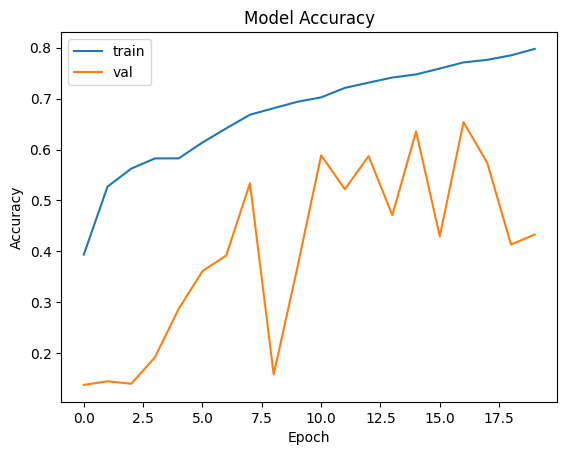

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

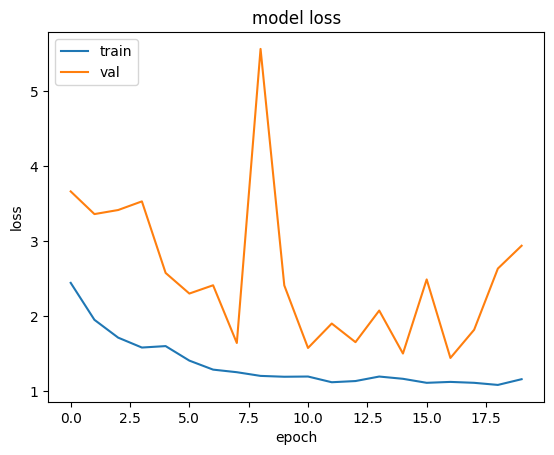

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
save_path = '/content/drive/MyDrive/artifacts/BaseModel/best_base_model_new.keras'
model.save(save_path)

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {acc*100:.2f}%")

154/154 - 36s - 236ms/step - accuracy: 0.6751 - loss: 1.3908
Test accuracy: 67.51%
